# FIGURE 2. EMT AND SIGNALING OF AXL MUTANTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from msresist.pre_processing import preprocessing
from msresist.figures.figure1 import plotClustergram, selectpeptides, barplot_UtErlAF154, IndividualTimeCourses
import warnings
warnings.simplefilter("ignore")

sns.set(style="whitegrid", font_scale=1.1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

In [8]:
pd.set_option('display.max_colwidth', 1000)
# pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

## CELL MIGRATION

## Time Course

### Relative Wound Density (RWD)

Calculates the density of both the cell region and the wound region as defined by the initial scratch wound mask, and measures (%) of the density of the wound region (W) relative to the density of the cell region(c):


$$ RWD(t) = \frac{W(t)-W(0)}{C(t)-W(0)} $$

In [2]:
# rwdM = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/03062020-AXLmuts_EMT_RWD_Matrigel_BR1.csv")
r1 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR1_RWD.csv")
r2 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR2_RWD.csv")
r3 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR3_RWD.csv")
r4 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR4_RWD.csv")
lines = ["WT", "KO", "KI", "KD", "Y634F", "Y643F", "Y698F", "Y726F", "Y750F ", "Y821F"]
lines_num = ["WT", "KO", "KI", "KD", "634", "643", "698", "726", "750", "821"]

In [3]:
cols = []
for label in r1.columns:
    if "UT" in label:
        cols.append(label.split(" ")[0])
    else:
        cols.append(label.replace(" ", "-"))

r1.columns = cols
r2.columns = cols
r3.columns = cols
r4.columns = cols

In [4]:
r1.columns

Index(['Elapsed', 'PC9', 'PC9-E', 'PC9-AF', 'PC9-A/E', 'KO', 'KO-E', 'KO-AF',
       'KO-A/E', 'KIN', 'KIN-E', 'KIN-AF', 'KIN-A/E', 'KD', 'KD-E', 'KD-AF',
       'KD-A/E', 'M4', 'M4-E', 'M4-AF', 'M4-A/E', 'M5', 'M5-E', 'M5-AF',
       'M5-A/E', 'M7', 'M7-E', 'M7-AF', 'M7-A/E', 'M10', 'M10-E', 'M10-AF',
       'M10-A/E', 'M11', 'M11-E', 'M11-AF', 'M11-A/E', 'M15', 'M15-E',
       'M15-AF', 'M15-A/E'],
      dtype='object')

In [5]:
ds = [r2, r3, r4]
itp = 0
ftp = 24
t1 = ["UT", "AF", "-E", "A/E"]
t2 = ["Untreated", "AF154", "Erlotinib", "Erl + AF154"]
ylabel = "Relative Wound Density"

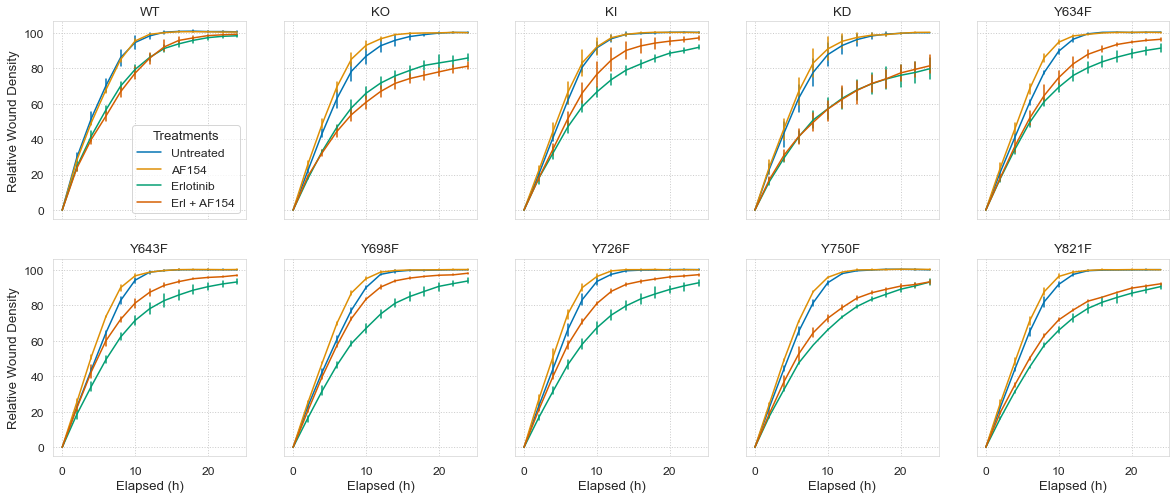

In [6]:
IndividualTimeCourses(ds, ftp, lines, t1, t2, ylabel, TimePointFC=False, TreatmentFC=False, savefig=True, figsize=(20, 8))

## At specified Endpoint

### RWD

In [15]:
r2

,Elapsed,PC9-UT,PC9-E,PC9-AF,PC9-A/E,KO-UT,KO-E,KO-AF,KO-A/E,KIN-UT,KIN-E,KIN-AF,KIN-A/E,KD-UT,KD-E,KD-AF,KD-A/E,M4-UT,M4-E,M4-AF,M4-A/E,M5-UT,M5-E,M5-AF,M5-A/E,M7-UT,M7-E,M7-AF,M7-A/E,M10-UT,M10-E,M10-AF,M10-A/E,M11-UT,M11-E,M11-AF,M11-A/E,M15-UT,M15-E,M15-AF,M15-A/E
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,32.264975,22.678570,29.954695,23.511300,18.949570,17.396455,22.040630,16.818340,17.604210,14.597615,15.453940,14.947370,15.280980,12.712935,16.812235,13.601360,20.880145,16.104070,21.202995,17.477835,22.336135,17.301830,28.869710,26.151955,20.599340,16.938055,23.822120,20.376205,18.888430,15.674090,24.071785,20.269315,25.655930,19.193715,25.018200,20.345380,21.996555,17.104185,23.046850,19.418675
2,4,56.794585,40.515665,52.575035,40.514290,36.414805,32.001770,42.730310,27.843675,37.599250,28.933045,33.104125,28.606870,29.222520,23.816880,34.454660,24.889055,39.188265,31.666720,42.545255,34.627495,42.259135,32.887730,53.488925,51.054040,39.155615,34.269045,46.912270,41.070940,37.700300,30.488560,46.567685,38.939500,48.170855,34.826315,48.890125,38.713105,43.549750,31.200065,43.911750,36.021090
3,6,76.573890,56.135920,72.290900,53.818275,51.964155,42.612115,60.548695,39.267045,56.729500,43.142725,51.896230,42.171855,45.105670,32.991140,51.190785,32.275005,59.139305,45.799630,65.857360,50.222325,61.642230,47.083790,73.678960,67.811710,56.685880,47.322170,68.213320,57.822855,57.864645,44.318600,69.970490,56.088970,68.341965,48.825720,71.296150,56.371755,62.856465,44.263585,66.123935,50.725275
4,8,91.428025,69.471425,87.441480,66.410025,64.866475,51.659425,77.375660,48.222460,72.972455,52.863920,67.532360,54.238260,59.689300,40.467990,66.532160,37.955355,74.944265,56.255980,83.589800,62.981620,80.675080,57.988715,87.149075,76.643245,73.472370,58.059305,84.344780,72.127380,75.569275,54.280220,85.278375,69.400755,84.157585,57.867265,88.274925,66.094135,77.380465,55.097715,83.386605,61.724095
5,10,97.962825,78.917795,96.676365,78.730025,74.778495,59.672605,88.164910,56.568925,84.511150,59.711810,82.167080,62.759965,72.867455,45.204075,77.850190,45.241285,87.171120,63.552090,93.978425,72.399695,92.836145,66.236850,94.948315,84.884980,88.227190,64.746855,93.465315,83.047065,89.334305,62.863445,93.917475,78.870530,95.611415,65.904990,96.582785,73.951225,87.797210,61.953345,94.416375,70.351080
6,12,100.291565,86.468675,100.148150,86.597525,83.407280,65.188270,93.702245,62.758000,92.670355,66.436525,93.434105,70.991750,81.718135,50.832865,87.053350,50.211025,94.459300,70.081820,98.011435,81.557015,97.851640,71.801215,98.149465,89.505365,96.831320,73.151500,97.888650,88.086805,95.329605,69.050540,98.825400,86.736855,98.768400,72.367990,98.671115,79.910735,95.575325,68.478360,98.044035,76.076015
7,14,101.069450,92.033525,100.754085,92.157240,89.462315,68.730240,97.872950,67.082220,97.149780,72.092950,97.115085,79.446470,89.930570,55.473335,92.295345,54.708320,99.237420,73.853070,98.844715,85.966215,98.917035,75.727510,99.583590,91.716065,97.738060,78.517845,99.089735,92.002610,98.423855,73.821030,99.786435,90.562225,100.134750,77.701745,99.629045,83.115965,98.811700,72.837505,99.509010,81.063765
8,16,101.574800,95.168380,100.846865,96.928555,94.009335,71.288185,98.913970,70.205590,98.456385,76.644020,99.062135,83.922615,94.942695,58.568350,96.149875,59.174960,100.533540,77.246120,99.478915,88.934385,99.623955,79.906265,100.399450,94.248000,99.209300,82.010045,99.969060,94.761150,99.180450,78.441830,99.755365,92.721355,100.053165,80.909270,99.489605,86.421455,99.717200,76.396550,100.282350,84.279640
9,18,101.844700,96.876665,100.144580,98.003250,97.405640,74.784810,99.607575,71.964885,99.267230,80.182465,100.070765,87

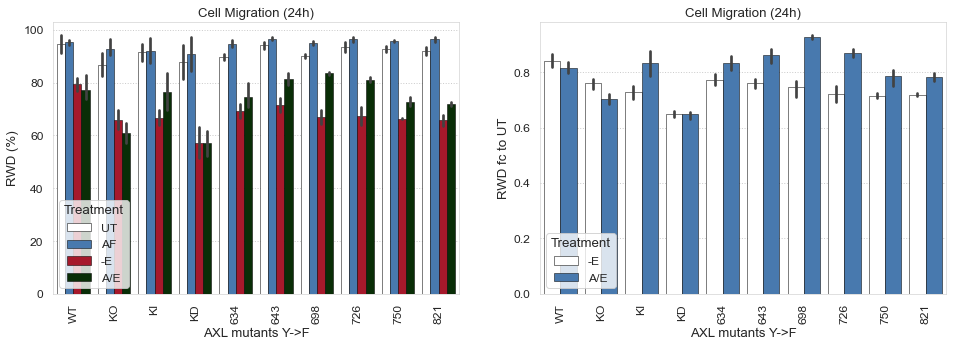

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

ftp = 10
itp = 0

tr1 = ["UT", "AF", "-E", "A/E"]
tr2 = ["Untreated", "AF154", "Erlotinib", "Erl + AF154"]

c = ["white", "windows blue", "scarlet", "dark green"]
barplot_UtErlAF154(ax[0], lines_num, ds, ftp, tr1, tr2, "RWD (%)", "Cell Migration (24h)", TimePointFC=False, TreatmentFC=False, colors=c)

tr1 = ['-E', 'A/E']
tr2 = ['Erlotinib', 'Erl + AF154']
barplot_UtErlAF154(ax[1], lines_num, ds, ftp, tr1, tr2, "RWD fc to UT", "Cell Migration (24h)", TimePointFC=False, TreatmentFC="-UT", colors=c)

# fig.savefig("AXLmutants_CV_96h.pdf", bbox_inches='tight');

## SIGNALING

## Selecting and Clustering a subset of kinases of interest

In [ ]:
A = preprocessing(Axlmuts_ErlAF154=True, log2T=True, mc_row=True)
A.columns = list(A.columns[:5]) + ["WT", "Knock-Out", "Kinase Dead", "Knock-In", "Y634F", "Y643F", "Y698F", "Y726F", "Y750F", "Y821F"]

B = preprocessing(Axlmuts_Erl=True, log2T=True, mc_row=True)
B.columns = A.columns

In [ ]:
A[A["Gene"].str.contains("PTPN11")]

In [ ]:
koi = {"AXL":["Y702-p", "Y759-p", "Y866-p"], "EGFR":"Y1197-p", "MET":"Y1003-p", "ERBB2":"Y877-p", "ERBB3":"Y1328-p", "EPHB3":"Y792-p", "GAB1":"Y627-p", "GAB2":"T265-p", "CRK":"Y251-p", 
    "CRKL":"Y251-p", "SHC1":"S426-p", "MAPK1":"Y187-p;T185-p", "MAPK7":"Y221-p", "MAPK12":"Y185-p", "MAPK13":"Y182-p", "MAPK14":"Y182-p", "BCAR1":["Y128-p", "Y410-p"], "BCAR3":"Y212-p", "NME2":"Y52-p",
    "DOCK1":"Y1811-p", "ELMO2":"Y48-p", "PTPN11":["Y542-p", "Y584-p"], "NEDD9":["189-p", "S182-p"], "TNS1":"Y1326-p", "TNS2":"Y483-p", "TNS3":["Y802-p", "Y855-p"], "CTTN":["Y421-p", "Y421-p;S418-p"], 
    "ANKS1A":"Y455-p", "FLNB":"Y2505-p", "PRKCD":"Y313-p", "ADAM9":["S816-p", "T777-p"], "BRK1":"Y63-p", "ARAP1":"Y231-p", "CTNND1":"Y228-p", "TNK2":"Y284-p", "RIN1":"Y681-p", "MCAM":"Y641-p", "SRCIN1":"Y396-p",
    "ITGB1":"T789-p", "ITGB4":"Y1207-p", "PTK2":"Y397-p"
}

In [ ]:
A = A.copy().set_index(["Abbv", "Position"])
B = B.copy().set_index(["Abbv", "Position"])

In [ ]:
Ams = selectpeptides(A.drop("WT", axis=1), koi)
Aredd = Ams.set_index(["Abbv", "Position"]).iloc[:, 3:].astype("float")

Bms = selectpeptides(B, koi)
Bredd = Bms.set_index(["Abbv", "Position"]).iloc[:, 3:].astype("float")

In [ ]:
plotClustergram(Aredd.T, "Reduced MS AXL mutants +Erl +F154", max(np.max(np.abs(Aredd)) * 0.3), figsize=(15, 7))

In [ ]:
plotClustergram(Bredd.T, "Reduced MS AXL mutants +Erlotinib", max(np.max(np.abs(Bredd)) * 0.3), figsize=(15, 7))